In [1]:
%load_ext autoreload

In [4]:
import os
import sys
import torch
import pykitti
import numpy as np
from pytf_utils import utils

%autoreload 1
%aimport pytf_utils.utils

In [5]:
ROOT_DIR = utils.get_git_root(os.getcwd())

In [6]:
lidar_dir = os.path.join(ROOT_DIR, 'EPNet', 'data', 'KITTI', 'object', 'training', 'velodyne')
import_dir = os.path.join(ROOT_DIR, 'EPNet')
import_dir2 = os.path.join(ROOT_DIR, 'EPNet', 'lib', 'net')

In [7]:
sys.path.insert(1, import_dir2)
sys.path.insert(1, import_dir)

In [8]:
from lib.net.point_rcnn import PointRCNN

In [10]:
model = PointRCNN(num_classes = 5, use_xyz = True, mode = 'TEST')

In [12]:
print(model)

PointRCNN(
  (rpn): RPN(
    (backbone_net): Pointnet2MSG(
      (SA_modules): ModuleList(
        (0): PointnetSAModuleMSG(
          (groupers): ModuleList(
            (0): QueryAndGroup()
            (1): QueryAndGroup()
          )
          (mlps): ModuleList(
            (0): SharedMLP(
              (layer0): Conv2d(
                (conv): Conv2d(4, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (bn): BatchNorm2d(
                  (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                )
                (activation): ReLU(inplace=True)
              )
              (layer1): Conv2d(
                (conv): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (bn): BatchNorm2d(
                  (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                )
                (activation): ReLU(inplace=True)
              )
              (layer2): Co

In [42]:
import pandas as pd
from pyntcloud import PyntCloud

In [14]:
lidar_files = sorted(os.listdir(lidar_dir))

In [15]:
len(lidar_files)

7481

In [79]:
with open(os.path.join(lidar_dir, lidar_files[1]), "rb") as f:
    data = np.fromfile(f, np.dtype(np.float32))
print(data)

[49.52  22.668  2.051 ... -1.391 -1.741  0.   ]


In [80]:
len(data)/4

120268.0

In [81]:
max(data)

77.005

In [82]:
lidar_cloud = np.array([data[0::4], data[1::4], data[2::4]]).transpose()
lidar_cloud = np.array([each for each in lidar_cloud if np.sqrt(each[0]**2 + each[1]**2) < 20])

In [83]:
lidar_cloud.shape

(94125, 3)

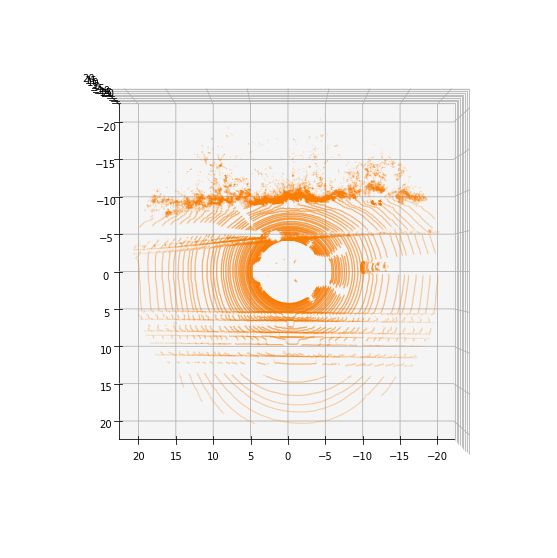

In [88]:
points = pd.DataFrame(lidar_cloud)
points.columns = ['x', 'y', 'z']
cloud = PyntCloud(points)
cloud.plot(elev=90.0, initial_point_size=0.001)